# Analiza rezultate Evaluarea Nationala 2014 - 2023

GitHub:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#from IPython.core.display import HTML
#HTML('<style>.input, .jp-InputArea {display: none !important}</style>')

## Incarcare fisiere

In [3]:
df = pd.read_csv("data/evnat_2014_2023.csv", low_memory=False)

In [4]:
df.sample(5)

,cod unic candidat,genul elevului,urban/rural,nota finala romana,nota finala matematica,media finala,media v-viii,judet,an
1237851,8053368,M,RURAL,6.85,7.45,7.15,9.14,CONSTANTA,2022
600710,12500494,M,URBAN,5.80,4.55,5.17,8.44,NaN,2017
805703,9902759,M,RURAL,5.70,4.10,4.90,8.73,NaN,2019
743307,9623700,M,RURAL,NaN,NaN,NaN,7.12,NaN,2018
79870,120633,F,RURAL,7.35,8.10,7.72,9.69,IALOMITA,2014


## Numarul de elevi participanti anual

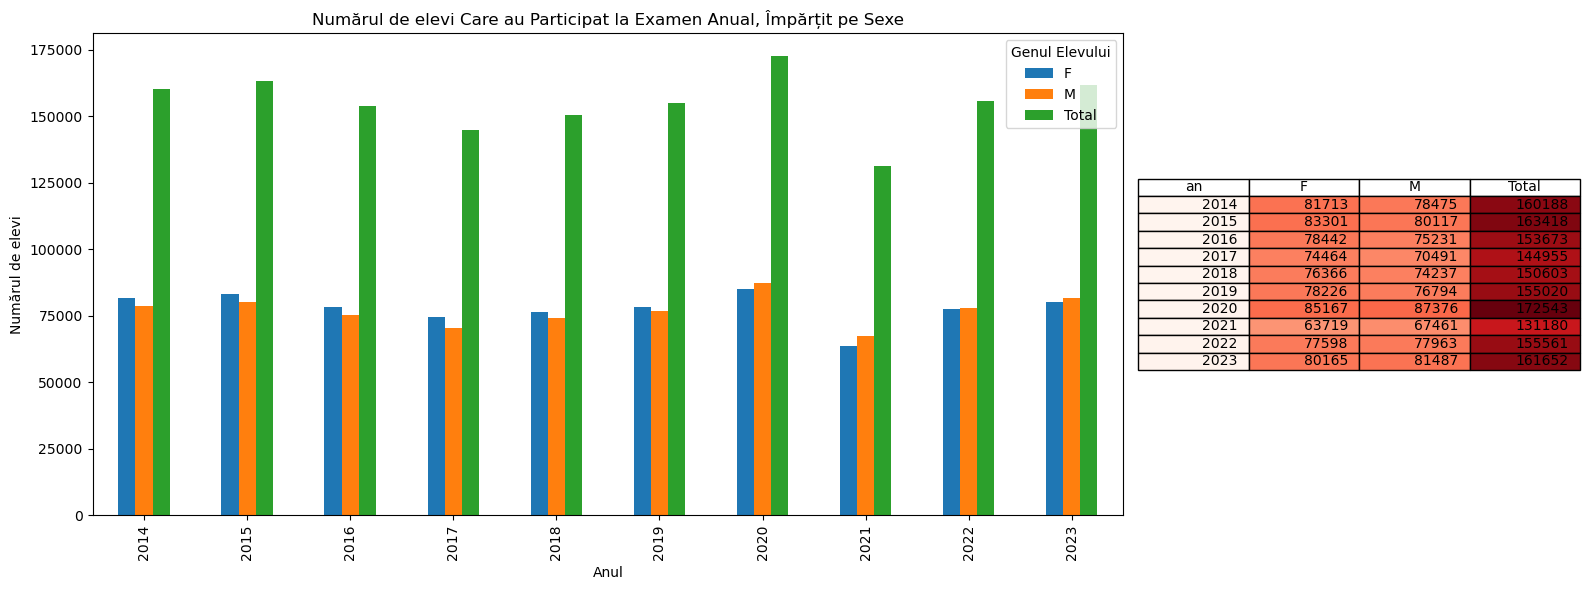

In [5]:
annual_participation = df.groupby(['an', 'genul elevului']).size().unstack()
annual_participation['Total'] = annual_participation.sum(axis=1)

# Crearea a două subplots cu dimensiuni ajustate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [70, 30]})

# Graficul cu bare
annual_participation.plot(kind='bar', stacked=False, ax=ax1)
ax1.set_title('Numărul de elevi Care au Participat la Examen Anual, Împărțit pe Sexe')
ax1.set_xlabel('Anul')
ax1.set_ylabel('Numărul de elevi')
ax1.legend(title='Genul Elevului')

# Prepararea datelor pentru tabel
table_data = annual_participation.reset_index()
table_data = table_data.round(2)

# Crearea tabelului și aplicarea culorii în celule
ax2.axis('off') 
the_table = ax2.table(cellText=table_data.values, colLabels=table_data.columns, loc='center')
max_value = table_data.select_dtypes(include=[np.number]).to_numpy().max()

# Aplicarea culorii în funcție de valoare
for (i, j), val in np.ndenumerate(table_data.select_dtypes(include=[np.number]).to_numpy()):
    intensity = val / max_value  # Calcularea intensității culorii
    color = plt.cm.Reds(intensity)  # Determining color based on intensity
    the_table[i+1, j].set_facecolor(color)  # Applying color

plt.tight_layout()
plt.show()

## Evoluția numărului de elevi cu note >= 5 și >= 7

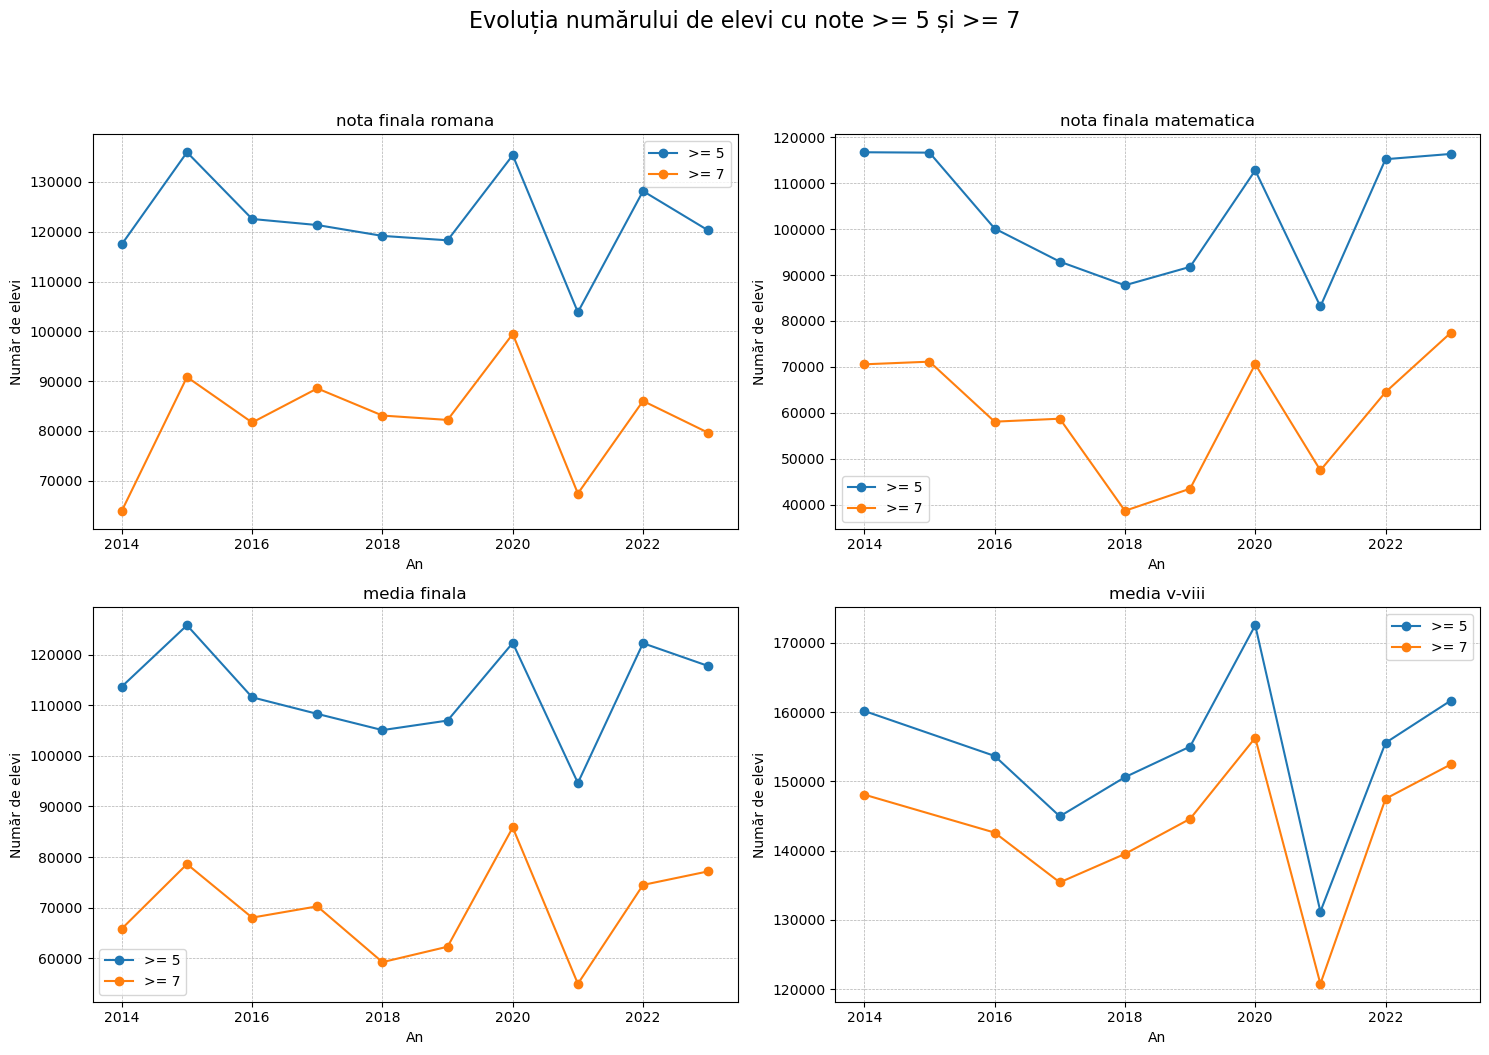

In [6]:
# Defining the categories of interest
categories = ['nota finala romana', 'nota finala matematica', 'media finala', 'media v-viii']

# Calculate the number of students with grades >= 5 and >= 7 for each category and year
results = {}
for category in categories:
    results[category] = {
        '>=5': df[df[category] >= 5].groupby('an').size(),
        '>=7': df[df[category] >= 7].groupby('an').size()
    }

results_df = pd.DataFrame(results)
results_df

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Evoluția numărului de elevi cu note >= 5 și >= 7', fontsize=16, y=1.05)

for ax, category in zip(axs.ravel(), categories):
    results[category]['>=5'].plot(ax=ax, label='>= 5', marker='o')
    results[category]['>=7'].plot(ax=ax, label='>= 7', marker='o')
    ax.set_title(category)
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xlabel('An')
    ax.set_ylabel('Număr de elevi')

plt.tight_layout()
plt.show()

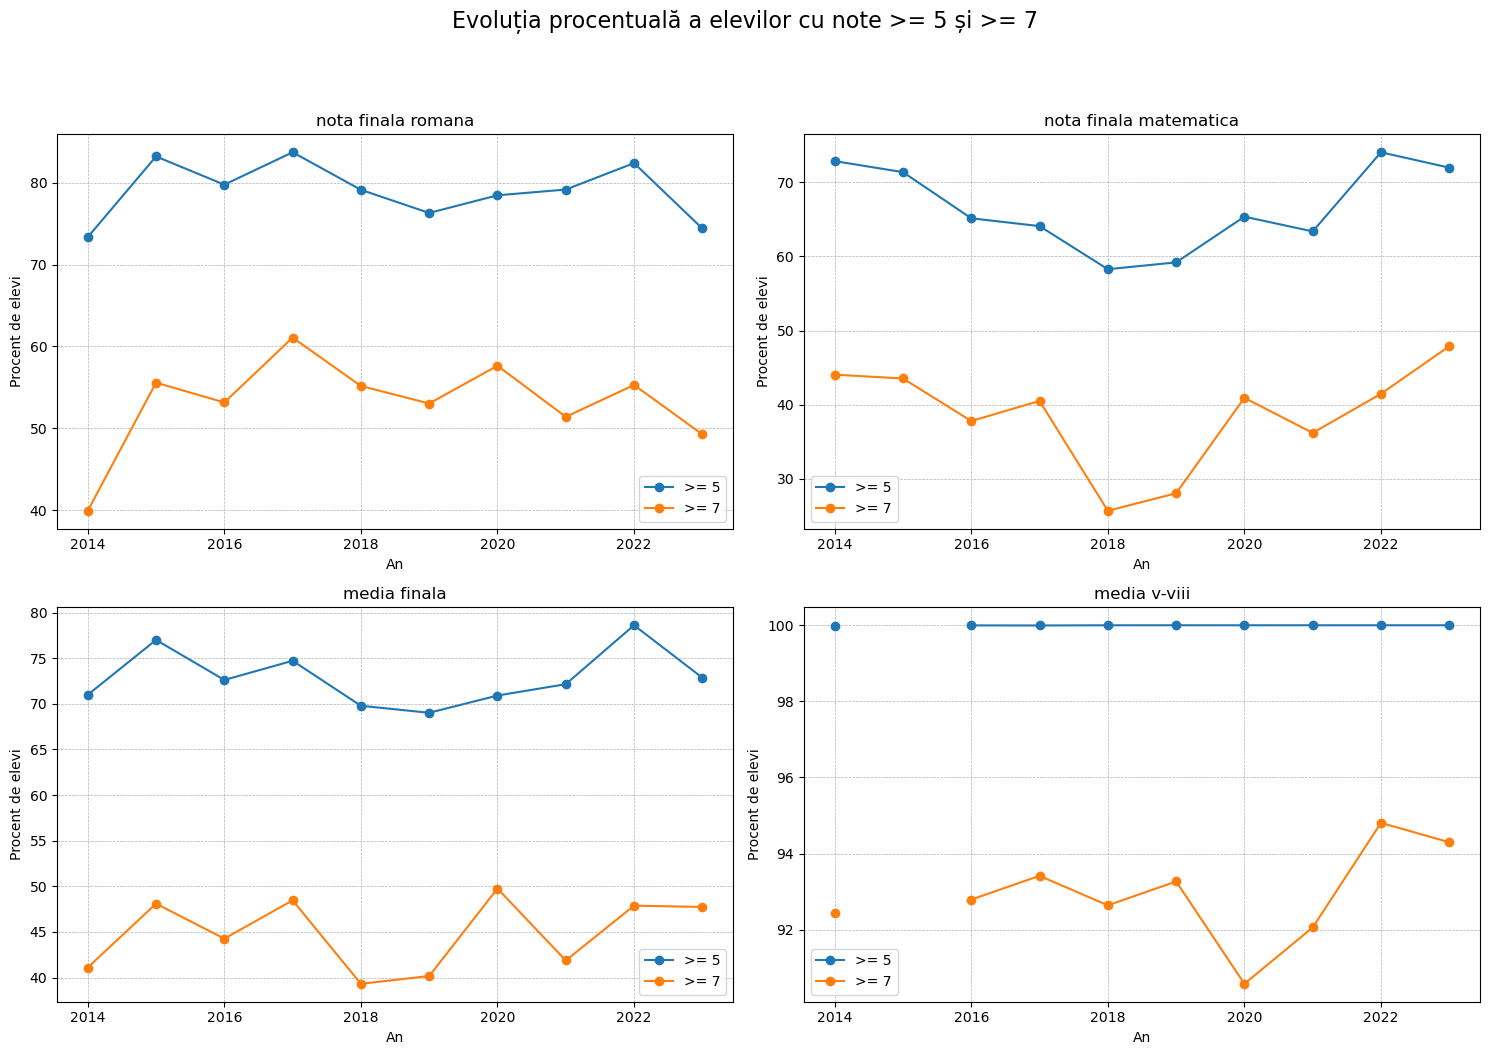

In [25]:
# Defining the categories of interest
categories = ['nota finala romana', 'nota finala matematica', 'media finala', 'media v-viii']

# Calculate the percentage of students with grades >= 5 and >= 7 for each category and year
results = {}
for category in categories:
    num_students = df.groupby('an').size()
    num_students_ge_5 = df[df[category] >= 5].groupby('an').size()
    num_students_ge_7 = df[df[category] >= 7].groupby('an').size()
    
    percentage_ge_5 = (num_students_ge_5 / num_students) * 100
    percentage_ge_7 = (num_students_ge_7 / num_students) * 100
    
    results[category] = {
        '>=5': percentage_ge_5,
        '>=7': percentage_ge_7
    }

results_df = pd.DataFrame(results)
results_df

# Creating plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Evoluția procentuală a elevilor cu note >= 5 și >= 7', fontsize=16, y=1.05)

for ax, category in zip(axs.ravel(), categories):
    results[category]['>=5'].plot(ax=ax, label='>= 5', marker='o')
    results[category]['>=7'].plot(ax=ax, label='>= 7', marker='o')
    ax.set_title(category)
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xlabel('An')
    ax.set_ylabel('Procent de elevi')

plt.tight_layout()
plt.show()

## Compararea performatei pe genuri

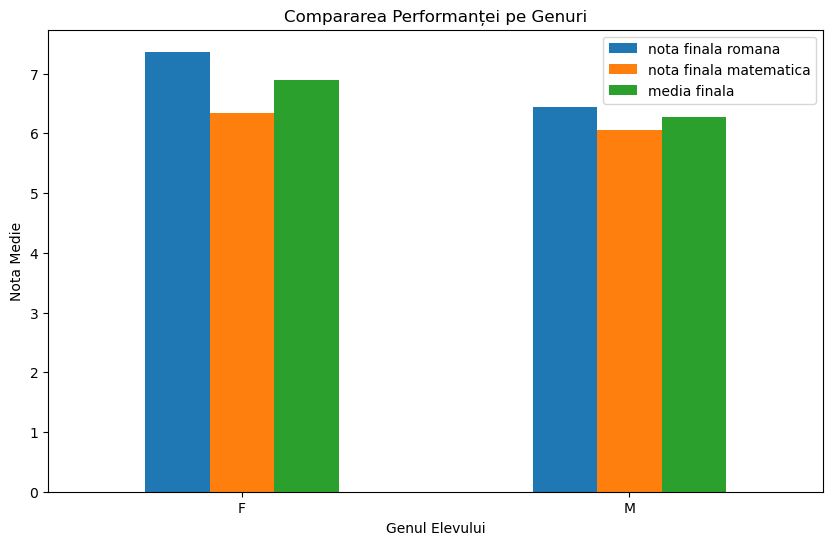

In [6]:
gender_grouped = df.groupby('genul elevului').mean(numeric_only=True)[['nota finala romana', 'nota finala matematica', 'media finala']]

# Plotting the results
gender_grouped.plot(kind='bar', figsize=(10,6))
plt.title('Compararea Performanței pe Genuri')
plt.ylabel('Nota Medie')
plt.xlabel('Genul Elevului')
plt.xticks(rotation=0)
plt.show()

### Analiza Anuală 

Comparăm performanța pe genuri pentru fiecare an în parte.

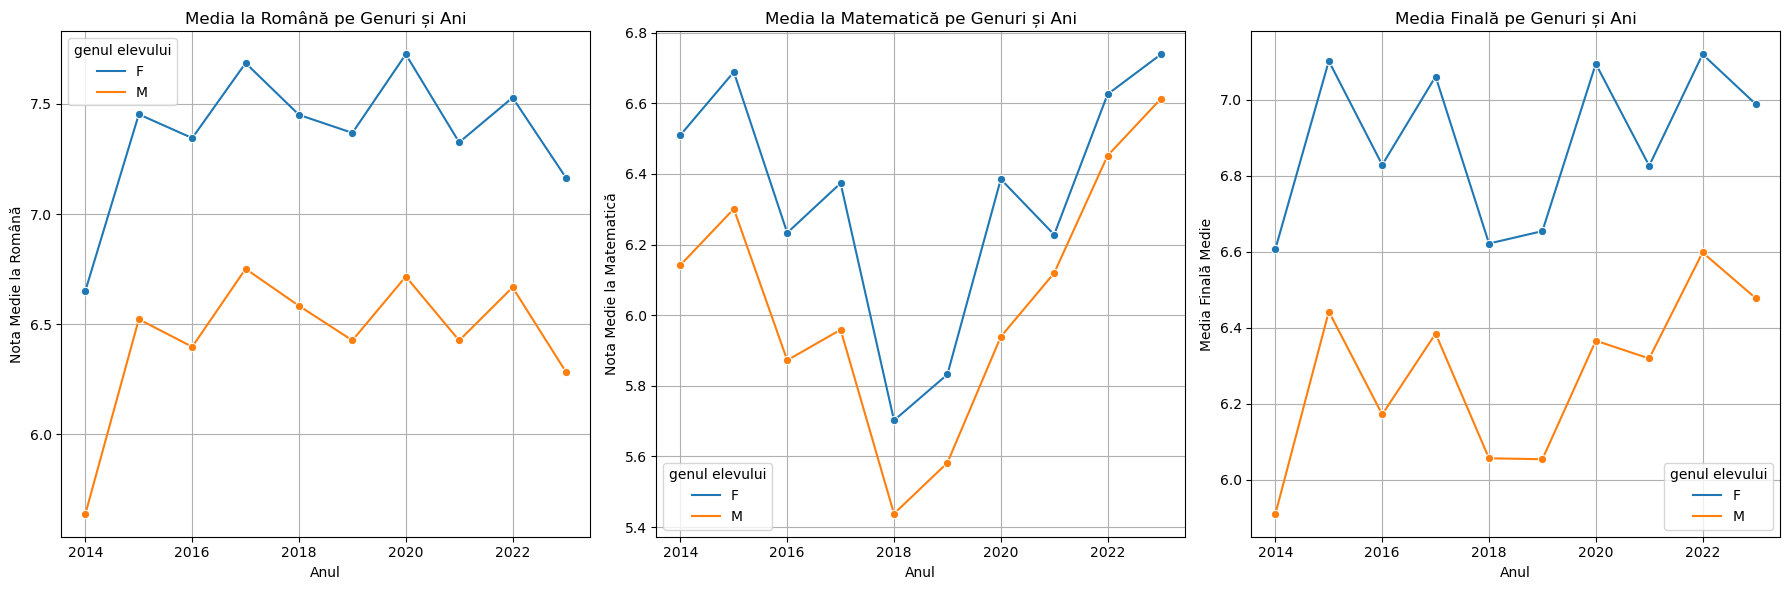

In [10]:
# Preparing data for annual gender comparison for each subject and overall average
annual_subject_comparison = df.groupby(['an', 'genul elevului']).mean(numeric_only=True).reset_index()

# Plotting the data for each subject and the overall average
plt.figure(figsize=(18, 6))

# Plot for Romanian
plt.subplot(1, 3, 1)
sns.lineplot(data=annual_subject_comparison, x='an', y='nota finala romana', hue='genul elevului', marker='o')
plt.title('Media la Română pe Genuri și Ani')
plt.xlabel('Anul')
plt.ylabel('Nota Medie la Română')
plt.grid(True)

# Plot for Mathematics
plt.subplot(1, 3, 2)
sns.lineplot(data=annual_subject_comparison, x='an', y='nota finala matematica', hue='genul elevului', marker='o')
plt.title('Media la Matematică pe Genuri și Ani')
plt.xlabel('Anul')
plt.ylabel('Nota Medie la Matematică')
plt.grid(True)

# Plot for Overall Average
plt.subplot(1, 3, 3)
sns.lineplot(data=annual_subject_comparison, x='an', y='media finala', hue='genul elevului', marker='o')
plt.title('Media Finală pe Genuri și Ani')
plt.xlabel('Anul')
plt.ylabel('Media Finală Medie')
plt.grid(True)

plt.tight_layout()
plt.show()

### Analiza Distribuției Notelor

Distribuția notelor pentru fiecare gen, folosind histograma. Astfel, putem vedea dacă există diferențe în variabilitatea scorurilor între fete și băieți.

- **Histograma pentru Română**: Compară distribuția notelor la limba română pentru fete (în albastru deschis) și băieți (în roșu). Acest grafic arată cum sunt distribuite notele și densitatea lor.
- **Histograma pentru Matematică**: Compară distribuția notelor la matematică pentru fete și băieți. Acesta oferă o vedere asupra modului în care scorurile se răspândesc și a diferențelor între genuri.
- **Histograma pentru Media Finală**: Ilustrează distribuția mediei finale pentru fete și băieți, oferind o perspectivă asupra variației generale în performanța academică.

> **Notă**: Aceste grafice ne permit să vedem nu doar mediile, ci și modul în care notele sunt răspândite între elevi de genuri diferite. Diferențele în formă, lățime și vârfuri ale distribuțiilor ne pot oferi informații despre variabilitatea și consistența performanței între genuri.

**Codul utilizat:**

```python
# Acesta este un bloc de cod
print("Exemplu de cod Python")


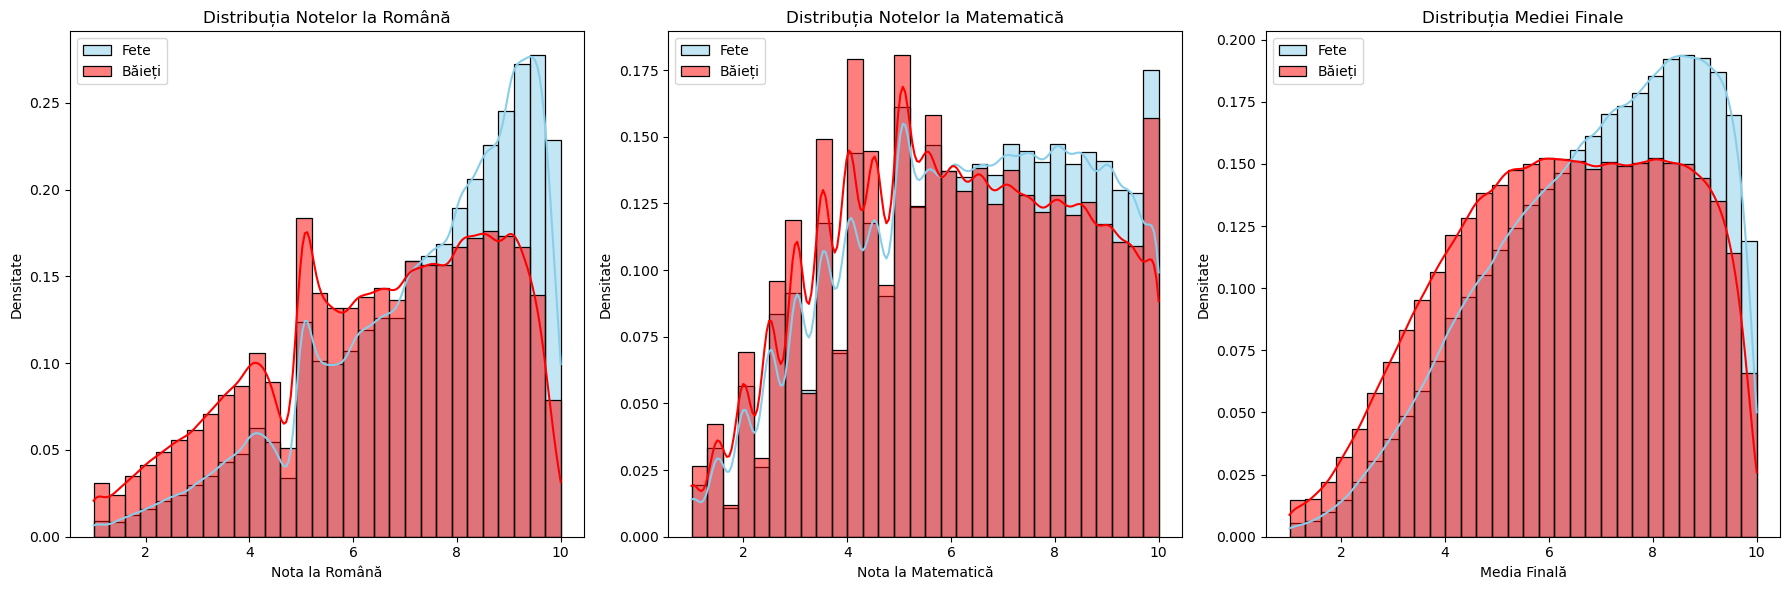

In [12]:
# Preparing data for distribution analysis
female_students = df[df['genul elevului'] == 'F']
male_students = df[df['genul elevului'] == 'M']

# Setting up the figure for multiple subplots
plt.figure(figsize=(18, 6))

# Histogram for Romanian grades
plt.subplot(1, 3, 1)
sns.histplot(female_students['nota finala romana'], color="skyblue", label="Fete", kde=True, stat="density", bins=30)
sns.histplot(male_students['nota finala romana'], color="red", label="Băieți", kde=True, stat="density", bins=30)
plt.title('Distribuția Notelor la Română')
plt.xlabel('Nota la Română')
plt.ylabel('Densitate')
plt.legend()

# Histogram for Mathematics grades
plt.subplot(1, 3, 2)
sns.histplot(female_students['nota finala matematica'], color="skyblue", label="Fete", kde=True, stat="density", bins=30)
sns.histplot(male_students['nota finala matematica'], color="red", label="Băieți", kde=True, stat="density", bins=30)
plt.title('Distribuția Notelor la Matematică')
plt.xlabel('Nota la Matematică')
plt.ylabel('Densitate')
plt.legend()

# Histogram for Final grades
plt.subplot(1, 3, 3)
sns.histplot(female_students['media finala'], color="skyblue", label="Fete", kde=True, stat="density", bins=30)
sns.histplot(male_students['media finala'], color="red", label="Băieți", kde=True, stat="density", bins=30)
plt.title('Distribuția Mediei Finale')
plt.xlabel('Media Finală')
plt.ylabel('Densitate')
plt.legend()

plt.tight_layout()
plt.show()

### Compararea Performanței în Funcție de Mediu Urban/Rural

Analizăm diferențele de performanță între fete și băieți din mediul urban față de cel rural.

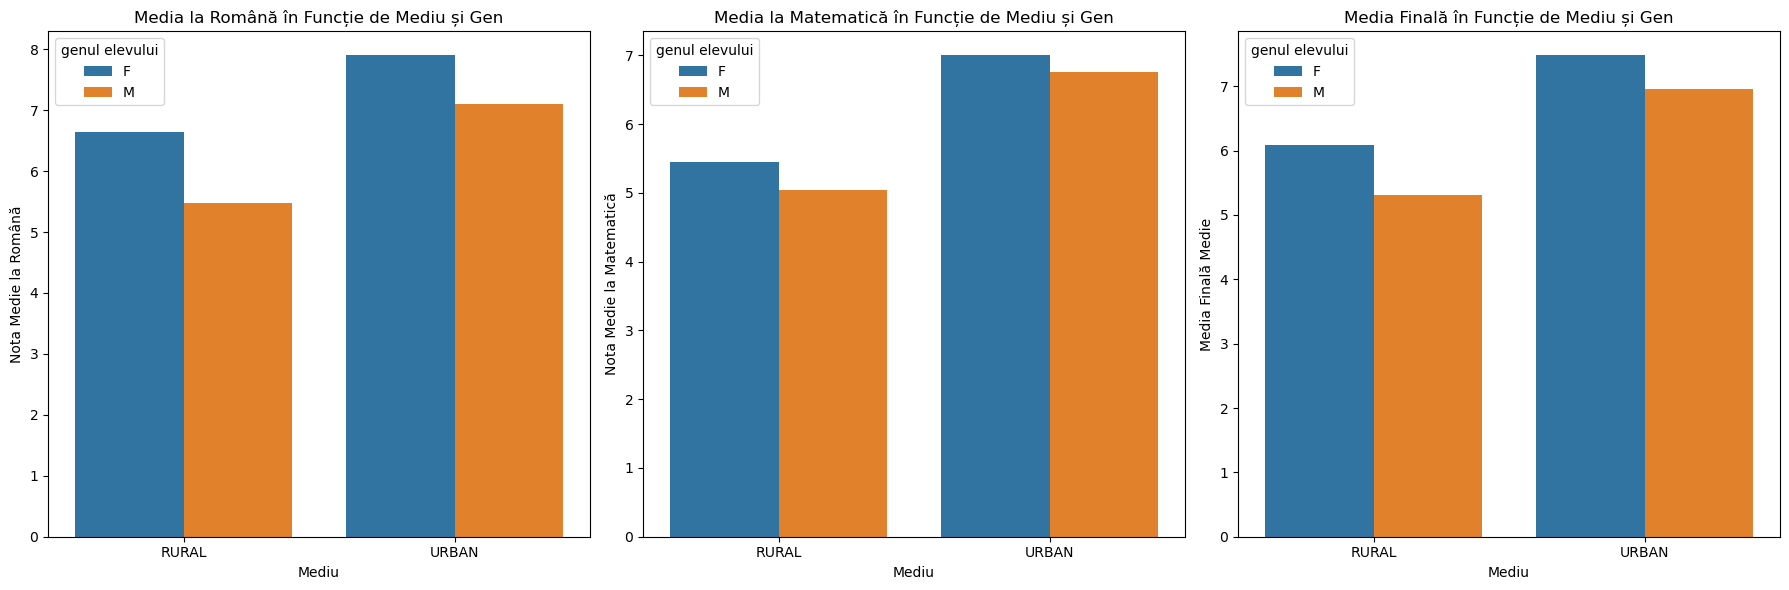

In [8]:
# Grouping the data by gender, environment (urban/rural), and calculating the mean for each subject and overall average
urban_rural_gender_grouped = df.groupby(['urban/rural', 'genul elevului'], as_index=False).mean(numeric_only=True)

# Setting up the figure for multiple subplots
plt.figure(figsize=(18, 6))

# Plot for Romanian grades in Urban vs Rural
plt.subplot(1, 3, 1)
sns.barplot(x="urban/rural", y="nota finala romana", hue="genul elevului", data=urban_rural_gender_grouped)
plt.title('Media la Română în Funcție de Mediu și Gen')
plt.xlabel('Mediu')
plt.ylabel('Nota Medie la Română')

# Plot for Mathematics grades in Urban vs Rural
plt.subplot(1, 3, 2)
sns.barplot(x="urban/rural", y="nota finala matematica", hue="genul elevului", data=urban_rural_gender_grouped)
plt.title('Media la Matematică în Funcție de Mediu și Gen')
plt.xlabel('Mediu')
plt.ylabel('Nota Medie la Matematică')

# Plot for Overall grades in Urban vs Rural
plt.subplot(1, 3, 3)
sns.barplot(x="urban/rural", y="media finala", hue="genul elevului", data=urban_rural_gender_grouped)
plt.title('Media Finală în Funcție de Mediu și Gen')
plt.xlabel('Mediu')
plt.ylabel('Media Finală Medie')

plt.tight_layout()
plt.show()

### Analiza Grupurilor de Performanță

Segmentăm elevii în grupuri bazate pe performanță (de exemplu, top 10%, mediu, jos 10%) și analizăm compoziția pe genuri în aceste grupuri.

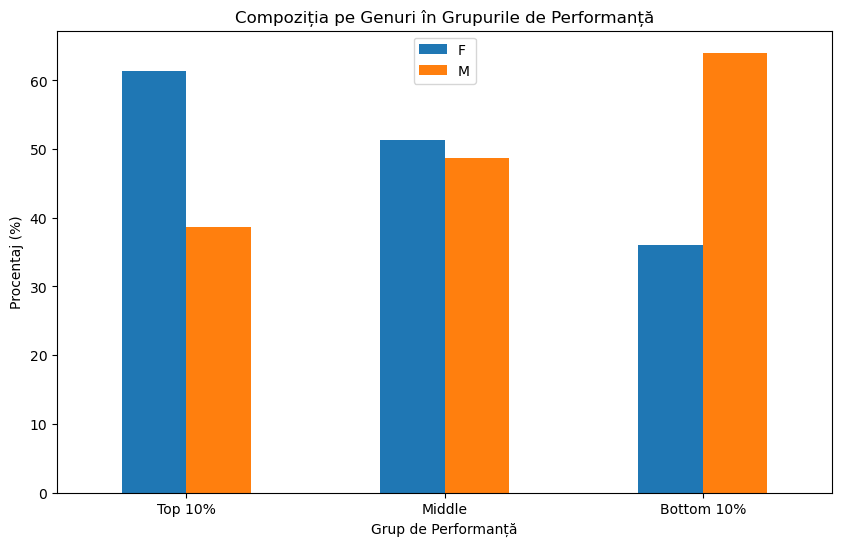

In [15]:
# Defining the percentile groups
top_10_percent = df['media finala'].quantile(0.90)
bottom_10_percent = df['media finala'].quantile(0.10)

# Segmenting the students into performance groups
top_students = df[df['media finala'] >= top_10_percent]
middle_students = df[(df['media finala'] < top_10_percent) & (df['media finala'] > bottom_10_percent)]
bottom_students = df[df['media finala'] <= bottom_10_percent]

# Calculating the gender composition in each group
gender_composition_top = top_students['genul elevului'].value_counts(normalize=True) * 100
gender_composition_middle = middle_students['genul elevului'].value_counts(normalize=True) * 100
gender_composition_bottom = bottom_students['genul elevului'].value_counts(normalize=True) * 100

# Creating a DataFrame for easier plotting
performance_groups_gender = pd.DataFrame({
    'Top 10%': gender_composition_top,
    'Middle': gender_composition_middle,
    'Bottom 10%': gender_composition_bottom
}).transpose()

# Plotting the data
performance_groups_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Compoziția pe Genuri în Grupurile de Performanță')
plt.ylabel('Procentaj (%)')
plt.xlabel('Grup de Performanță')
plt.xticks(rotation=0)
plt.show()

## Influenta media notelor din clasele V-VIII asupra notelor de la examen

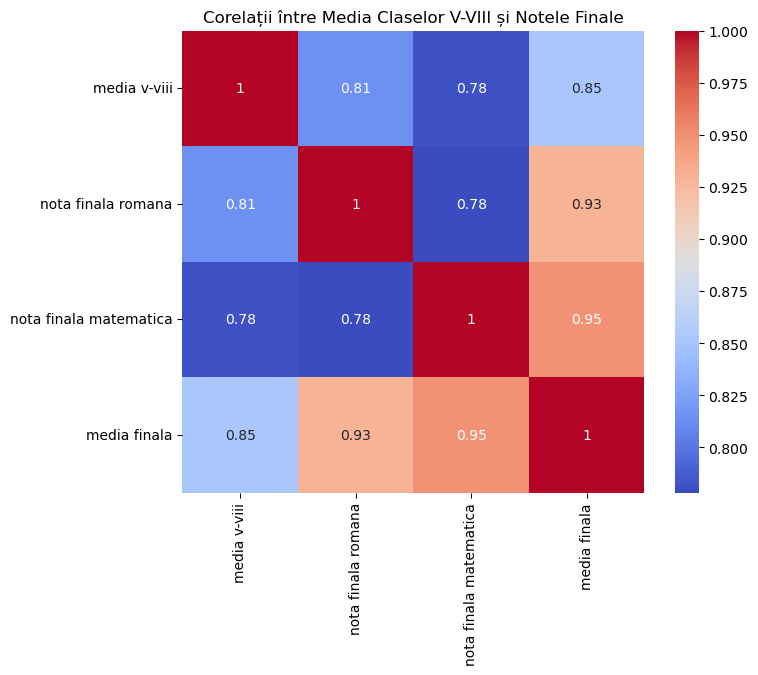

In [16]:
# Calculating the correlation between the average grades in classes V-VIII and the final grades
correlation_with_class_v_viii = df[['media v-viii', 'nota finala romana', 'nota finala matematica', 'media finala']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_class_v_viii, annot=True, cmap="coolwarm", cbar=True, square=True)
plt.title('Corelații între Media Claselor V-VIII și Notele Finale')
plt.show()
